# Exploratory Data Analysis of MNIST

## Table of Content

<!-- toc -->

## Handling Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from IPython.display import display
import os
import random
import cv2

## Importing Data

In [2]:
data_path = '../../data/raw/mnist/'
test_name = 'test.csv'
train_name = 'train.csv'

In [75]:
test_df = pd.read_csv(os.path.join(data_path, test_name))
train_df = d=pd.read_csv(os.path.join(data_path, train_name))

In [76]:
display(train_df.shape)
display(test_df.shape)

(42000, 785)

(28000, 784)

In [77]:
display(train_df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
display(test_df.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Reviewing data

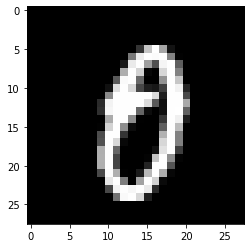

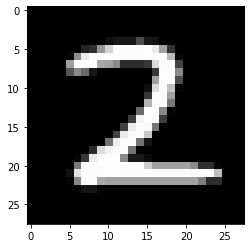

In [74]:
random_index_train = random.randint(0, train_df.shape[0])
random_train = np.array(train_df.iloc[random_index_train])
plt.imshow(random_train[1:].reshape((28,28)), cmap='gray')
plt.show()
random_index_test = random.randint(0, test_df.shape[0])
random_test = np.array(test_df.iloc[random_index_test])
plt.imshow(random_test.reshape((28,28)), cmap='gray')
plt.show()

## Converting data into image

We have to convert the above said data from a (784,) shaped series into a (28,28) shaped array so that we can work on it properly and perform image processing algorithms on it

### Coverting Function

This function will convert the said series of the dataframe into a Series object containing the 28x28 image and its label.

Note: Here we are returning a Series object with the column mentioned so that the resultant Dataframe on using the `apply` function will have the specified column names as its own column names.

In [79]:
def convert_series_to_image(s):
    if s.size == 785:
        img = np.array(s[1:]).reshape((28,28))
        label = s[0]
        return pd.Series([img, label], index=['image', 'label'])
    else:
        img = np.array(s).reshape((28,28))
        return pd.Series([img], index=['image'])

### Performing the conversion

Here we will apply the above function on our dataframe to get a ouput dataframe which has 2 columns i.e the 28x28 image and its corresponding label.

Note: Here we have passed a parameter called `result_type`. This parameter decides what will be the format of the output after applying the function row-wise. Here the output will be a dataframe.

#### Train Data

In [80]:
train_image_df = train_df.apply(convert_series_to_image, result_type='expand', axis='columns')

In [81]:
display(train_image_df.head())
display(train_image_df.shape)

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


(42000, 2)

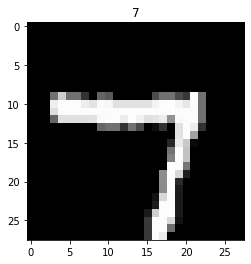

In [82]:
random_index = random.randint(0, train_image_df.shape[0])
random_image_data = train_image_df.iloc[random_index]
plt.imshow(random_image_data[0], cmap='gray')
plt.title(str(random_image_data[1]))
plt.show()

#### Test Data

In [83]:
test_image_df = test_df.apply(convert_series_to_image, result_type='expand', axis='columns')
display(test_image_df.head())

,image
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [84]:
display(test_image_df.shape)

(28000, 1)

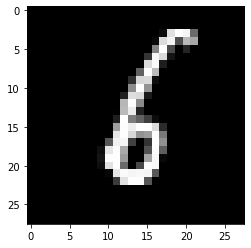

In [85]:
random_index = random.randint(0, test_image_df.shape[0])
random_image_data = train_image_df.iloc[random_index]
plt.imshow(random_image_data[0], cmap='gray')
plt.show()

## Experimenting with Pre-Processing Methods

### Thresholding

We can see tat the figure is not quite clear, we can make it clearn using a thresholding function to convert any pixel less than 250 to 0.
This way the gray areas of the image will turn into black and the image will look much clear.

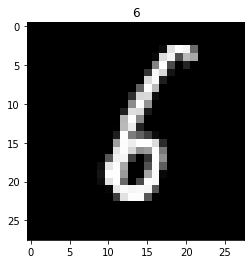

In [110]:
img_threshold = copy.deepcopy(random_image_data[0])
plt.imshow(img_threshold, cmap='gray')
plt.title(str(random_image_data[1]))
plt.show()

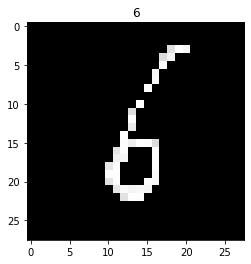

In [104]:
img_threshold[img_threshold < 220] = 0
plt.imshow(img_threshold, cmap='gray')
plt.title(str(random_image_data[1]))
plt.show()

After some hit and trial I came to the conclusion that the threshold value of 220 works best in this scenario.

### Closing

From thresholding we can observe that some images show broken links, as a result the image might not be able to denote properly which digit it wants to represent. This breaking of line can be filled using the concept of closing.

In [106]:
img_close = cv2.morphologyEx(random_image_data[0].astype(np.uint8), cv2.MORPH_CLOSE, np.ones((5,5)))

After some hit and trial I have come to the conclusion of using a (5,5) kernel.

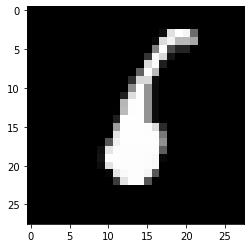

In [107]:
plt.imshow(img_close, cmap='gray')
plt.show()

#### Closing using custom Kernel

In [108]:
kernel = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], np.uint8)
img_close_custom = cv2.morphologyEx(random_image_data[0].astype(np.uint8), cv2.MORPH_CLOSE, kernel)

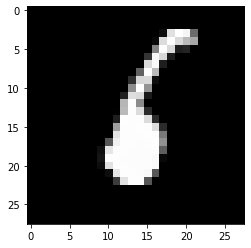

In [109]:
plt.imshow(img_close_custom, cmap='gray')
plt.show()

### Erosion

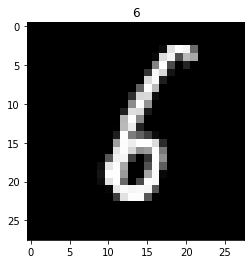

In [188]:
img_erosion = copy.deepcopy(random_image_data[0])
plt.imshow(img_erosion, cmap='gray')
plt.title(str(random_image_data[1]))
plt.show()

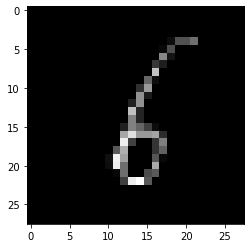

In [189]:
img_erosion = cv2.erode(img_erosion.astype(np.uint8), kernel=np.ones((2,2), np.uint8))
plt.imshow(img_erosion, cmap='gray')
plt.show()

After some hit and trial I feel a (2,2) filter is good for erosion.

It feels that just using erosion is much better alternative to thresholding+closing method.

### Reverse Thresholding

coverting a pixel above a particular threshold to full value i.e. 255.

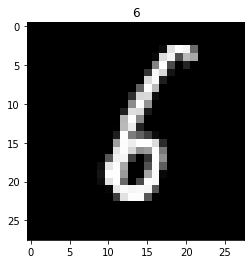

In [113]:
img_reverse_threshold = copy.deepcopy(random_image_data[0])
plt.imshow(img_reverse_threshold, cmap='gray')
plt.title(str(random_image_data[1]))
plt.show()

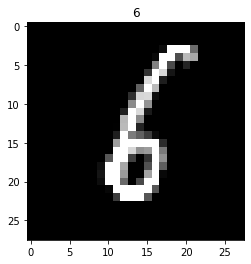

In [114]:
img_reverse_threshold[img_reverse_threshold >= 220] = 255
plt.imshow(img_reverse_threshold, cmap='gray')
plt.title(str(random_image_data[1]))
plt.show()

### Binary Transformation

Here we apply both thresholding and reverse thresholding so that the output only contains value 0 and 255.

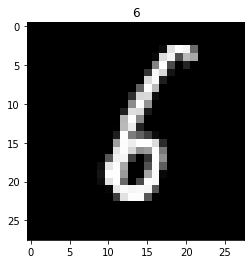

In [119]:
img_binary = copy.deepcopy(random_image_data[0])
plt.imshow(img_binary, cmap='gray')
plt.title(str(random_image_data[1]))
plt.show()

In [134]:
def binary_transform(img, limit):
    img[img < limit] = 0
    img[img > limit] = 255
    return img

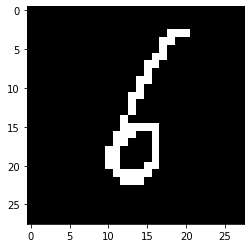

In [135]:
plt.imshow(binary_transform(img_binary, 200), cmap='gray')
plt.show()

### Skeletonization

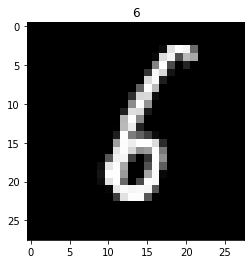

In [144]:
img_skeleton = copy.deepcopy(random_image_data[0])
plt.imshow(img_skeleton, cmap='gray')
plt.title(str(random_image_data[1]))
plt.show()

In [205]:
def skeleton_transform(img, kernel):
    skeleton = np.zeros((28, 28), np.uint8)
    size = np.size(img)
    img = img.astype(np.uint8)
    while(True):
        #plt.subplot(1, 5, 1, title='image').imshow(img, cmap='gray')
        erode = cv2.erode(img, kernel=kernel)
        #plt.subplot(1, 5, 2, title='erode').imshow(erode, cmap='gray')
        temp = cv2.dilate(erode, kernel)
        #plt.subplot(1, 5, 3, title='dilate').imshow(temp, cmap='gray')
        temp = cv2.subtract(img, temp)
        #plt.subplot(1, 5, 4, title='subtract').imshow(temp, cmap='gray')
        skeleton = cv2.bitwise_or(skeleton, temp)
        #plt.subplot(1, 5, 5, title='skeleton').imshow(skeleton, cmap='gray')
        #plt.show()
        img = erode.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros == size:
            break
    return skeleton

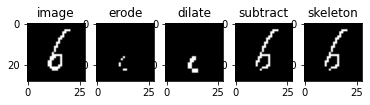

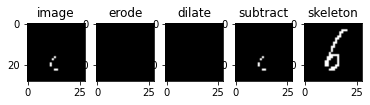

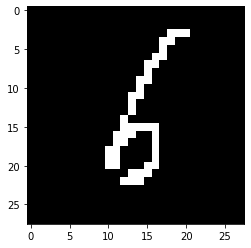

In [187]:
kernel_skeleton = np.ones((2, 2), np.uint8)
img_skeleton = skeleton_transform(img_skeleton, kernel_skeleton)
plt.imshow(img_skeleton, cmap='gray')
plt.show()

### Conclusion

Lets see the result and try to conclude which preprocessing fits our needs the best.

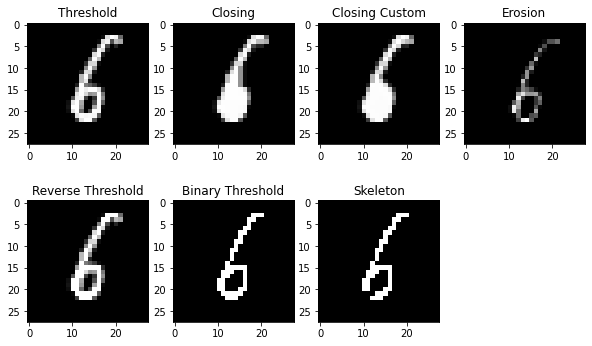

In [196]:
plt.figure(figsize=(10, 6))
plt.title('PreProcessing Methods Output')
rcols = 2
ncols = 4
plt.subplot(rcols, ncols, 1, title='Threshold').imshow(img_threshold, cmap='gray')
plt.subplot(rcols, ncols, 2, title='Closing').imshow(img_close, cmap='gray')
plt.subplot(rcols, ncols, 3, title='Closing Custom').imshow(img_close_custom, cmap='gray')
plt.subplot(rcols, ncols, 4, title='Erosion').imshow(img_erosion, cmap='gray')
plt.subplot(rcols, ncols, 5, title='Reverse Threshold').imshow(img_reverse_threshold, cmap='gray')
plt.subplot(rcols, ncols, 6, title='Binary Threshold').imshow(img_binary, cmap='gray')
plt.subplot(rcols, ncols, 7, title='Skeleton').imshow(img_skeleton, cmap='gray')

Here can see that Binary Threshold and skeleton Performs the best for our use case scenario.

## Applying the Pre-Process methods to the dataset

Now that we have experimented with the methods on a random input, lets apply the methdo on all the test and train data.

### Binary Threshold

In [214]:
## Process Parameter
PROCESS_BINARY_LIMIT = 200
PROCESS_BINARY_TITLE = 'processed_image_binary'

In [215]:
def process_image_binary(s):
    img = copy.deepcopy(s['image'])
    img = binary_transform(img, PROCESS_BINARY_LIMIT)
    return pd.Series([img], index=[PROCESS_BINARY_TITLE])

In [216]:
train_image_df[PROCESS_BINARY_TITLE] = train_image_df.apply(process_image_binary, axis='columns')
display(train_image_df.head())
display(train_image_df.shape)

,image,label,processed_image,processed_image_binary
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(42000, 4)

In [217]:
test_image_df[PROCESS_BINARY_TITLE] = test_image_df.apply(process_image_binary, axis='columns')
display(test_image_df.head())
display(test_image_df.shape)

,image,processed_image,processed_image_binary
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(28000, 3)

#### Comparing Result of Processing

In [218]:
def plot_random_images(df, n, title):
    rows = int(np.ceil(n ** 0.5))
    cols = np.ceil(2*(n ** 0.5))
    plt.figure(figsize=(20, 10))
    j = 1
    for i in range(n):
        rand_index = random.randint(0, df.shape[0])
        img = df['image'].iloc[rand_index]
        pr_img = df[title].iloc[rand_index]
        subplt_l = plt.subplot(rows, cols, j)
        subplt_l.imshow(img, cmap='gray')
        subplot_r = plt.subplot(rows, cols, j + rows)
        subplot_r.imshow(pr_img, cmap='gray')
        if j % rows == 0:
            j = j + rows
        j += 1
    plt.show()

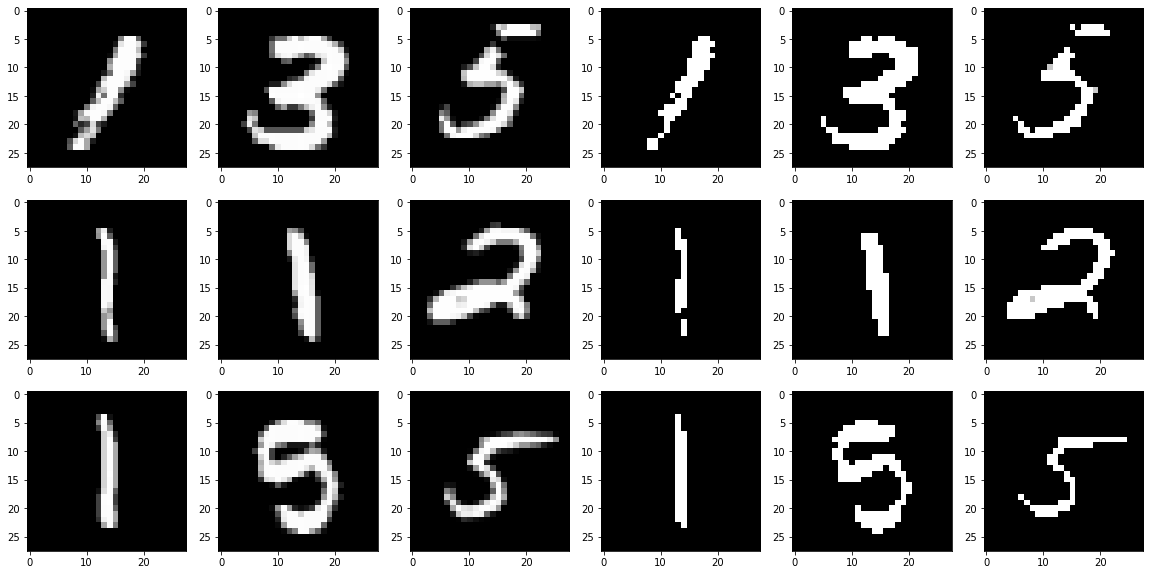

In [219]:
plot_random_images(train_image_df, 9, PROCESS_BINARY_TITLE)

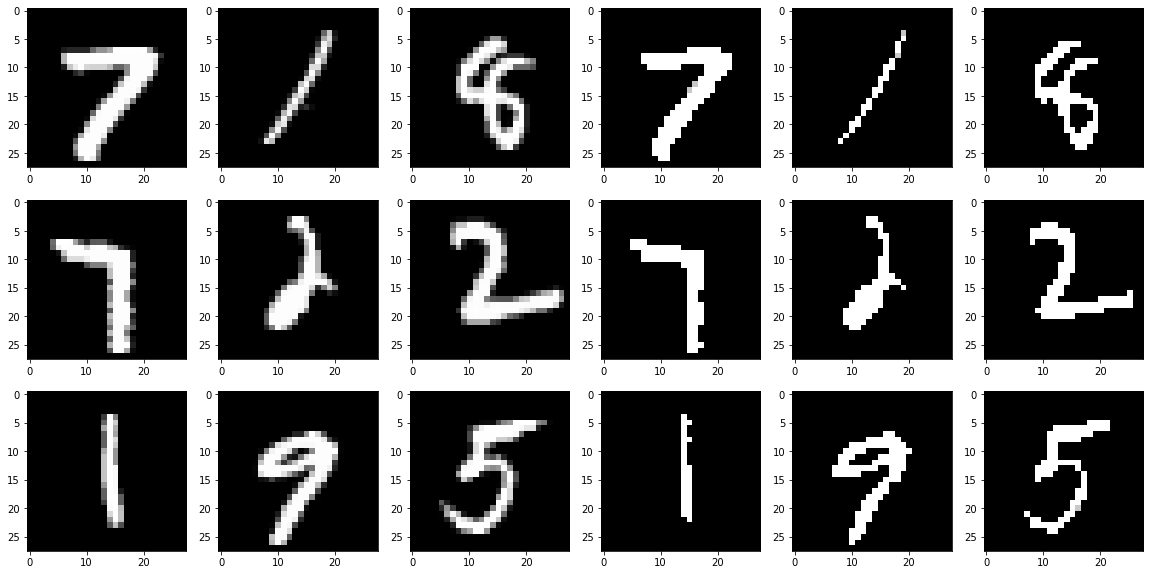

In [220]:
plot_random_images(test_image_df, 9, PROCESS_BINARY_TITLE)

### Skeleton with Binary

In [221]:
## Process Parameter
PROCESS_SKELETON_KERNEL = np.ones((2,2), np.uint8)
PROCESS_BINARY_LIMIT = 200
PROCESS_SKEL_BINARY_TITLE = 'processed_image_skeleton_binary'

In [222]:
def process_image_skeleton_binary(s):
    img = copy.deepcopy(s['image'])
    img = skeleton_transform(img, PROCESS_SKELETON_KERNEL)
    img = binary_transform(img, PROCESS_BINARY_LIMIT)
    return pd.Series([img], index=[PROCESS_SKEL_BINARY_TITLE])

In [223]:
train_image_df[PROCESS_SKEL_BINARY_TITLE] = train_image_df.apply(process_image_skeleton_binary, axis='columns')
display(train_image_df.head())
display(train_image_df.shape)

,image,label,processed_image,processed_image_binary,processed_image_skeleton_binary
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(42000, 5)

In [224]:
test_image_df[PROCESS_SKEL_BINARY_TITLE] = test_image_df.apply(process_image_skeleton_binary, axis='columns')
display(test_image_df.head())
display(test_image_df.shape)

,image,processed_image,processed_image_binary,processed_image_skeleton_binary
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(28000, 4)

#### Comparing Result of Processing

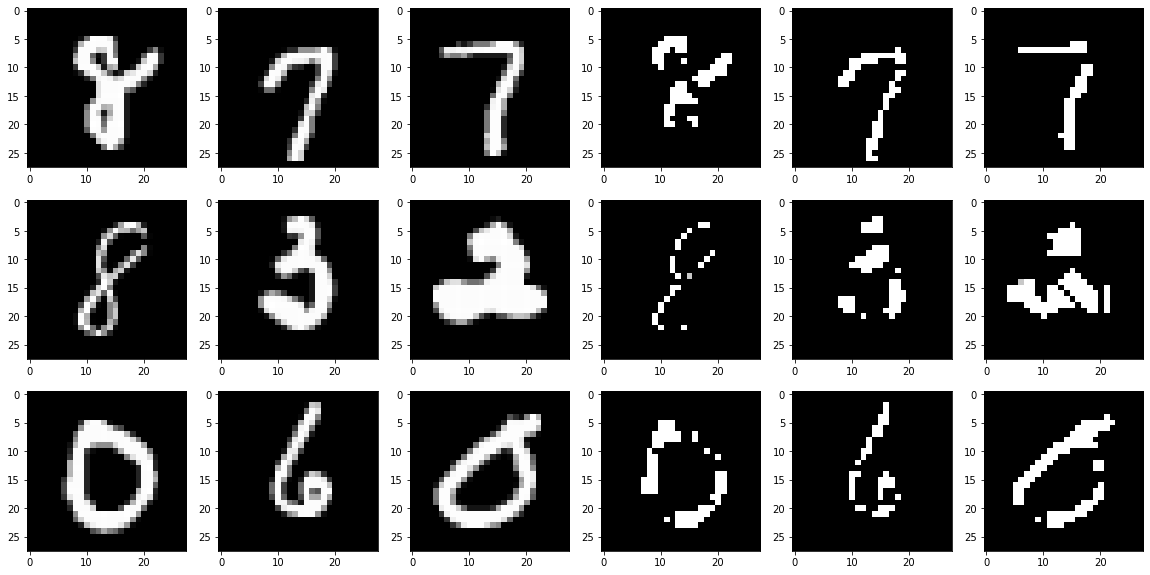

In [225]:
plot_random_images(train_image_df, 9, PROCESS_SKEL_BINARY_TITLE)

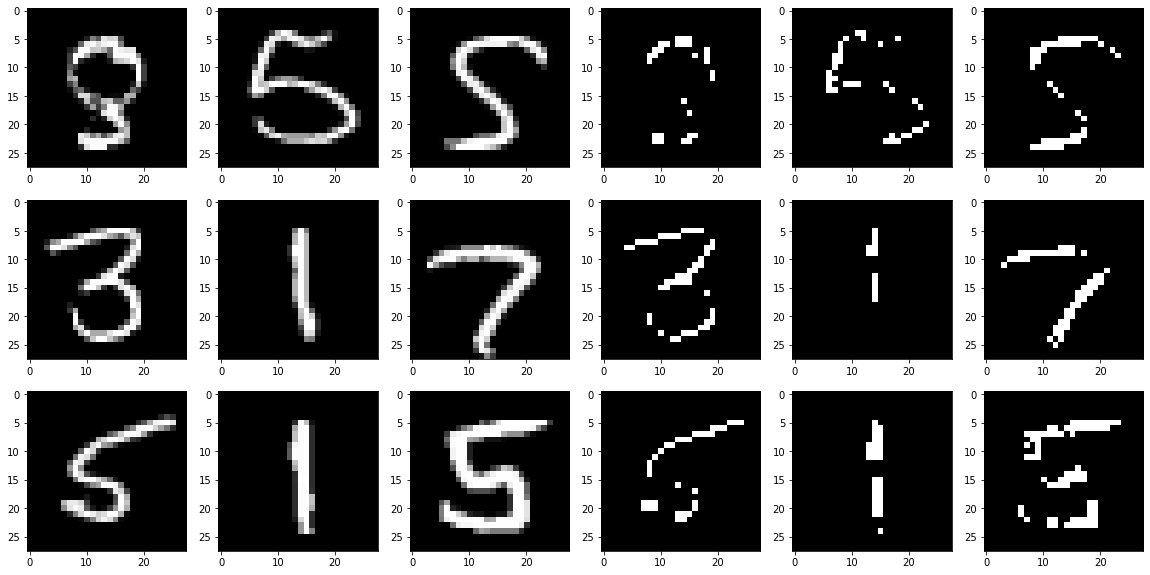

In [226]:
plot_random_images(test_image_df, 9, PROCESS_SKEL_BINARY_TITLE)

### Skeleton

In [227]:
## Process Parameter
PROCESS_SKELETON_KERNEL = np.ones((2,2), np.uint8)
PROCESS_SKEL_TITLE = 'processed_image_skeleton'

In [228]:
def process_image_skeleton(s):
    img = copy.deepcopy(s['image'])
    img = skeleton_transform(img, PROCESS_SKELETON_KERNEL)
    return pd.Series([img], index=[PROCESS_SKEL_TITLE])

In [229]:
train_image_df[PROCESS_SKEL_TITLE] = train_image_df.apply(process_image_skeleton, axis='columns')
display(train_image_df.head())
display(train_image_df.shape)

,image,label,processed_image,processed_image_binary,processed_image_skeleton_binary,processed_image_skeleton
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(42000, 6)

In [230]:
test_image_df[PROCESS_SKEL_TITLE] = test_image_df.apply(process_image_skeleton, axis='columns')
display(test_image_df.head())
display(test_image_df.shape)

,image,processed_image,processed_image_binary,processed_image_skeleton_binary,processed_image_skeleton
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(28000, 5)

#### Comparing Result of Processing

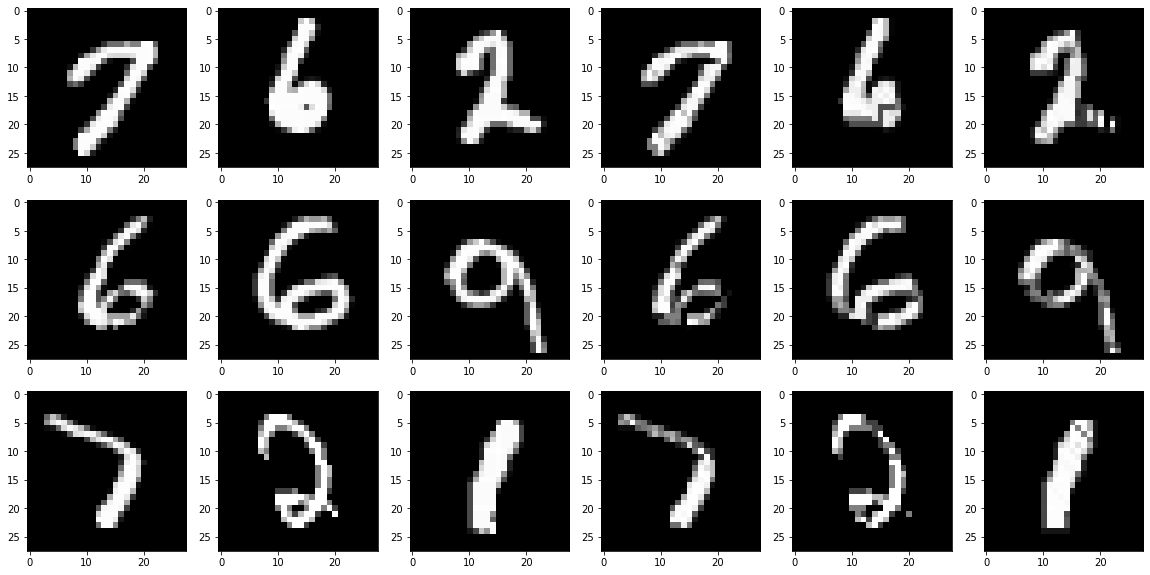

In [231]:
plot_random_images(train_image_df, 9, PROCESS_SKEL_TITLE)

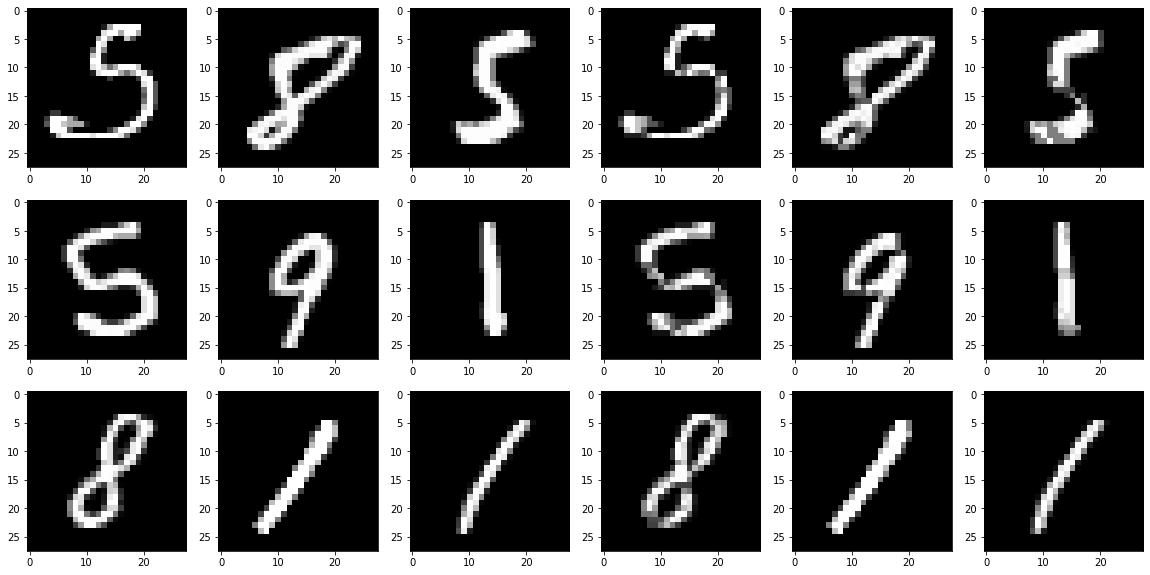

In [232]:
plot_random_images(test_image_df, 9, PROCESS_SKEL_TITLE)

## Post process Data Analysis

## Conclusion

We can conclude that Binary Thresholding is the way to go as it retains most amount of information compared to other thransformations.